## Importing libraries and loading data

In [16]:
import os
import pandas as pd
import  numpy as np
import matplotlib as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
##Read files:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
sub= pd.read_csv("SampleSubmission.csv")

### combine both train and test data sets into one

In [3]:
data=pd.concat([train,test],sort=False).reset_index(drop=True)
data.columns.tolist()

['ID',
 'country',
 'year',
 'urban_or_rural',
 'ghsl_water_surface',
 'ghsl_built_pre_1975',
 'ghsl_built_1975_to_1990',
 'ghsl_built_1990_to_2000',
 'ghsl_built_2000_to_2014',
 'ghsl_not_built_up',
 'ghsl_pop_density',
 'landcover_crops_fraction',
 'landcover_urban_fraction',
 'landcover_water_permanent_10km_fraction',
 'landcover_water_seasonal_10km_fraction',
 'nighttime_lights',
 'dist_to_capital',
 'dist_to_shoreline',
 'Target']

In [4]:
data.head()

,ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,Target
0,ID_AAIethGy,Ethiopia,2016,R,0.0,0.000000,0.000000,0.000055,0.000536,0.999408,12.146134,25.489659,0.879484,0.000000,0.000000,0.000000,278.788451,769.338378,0.132783
1,ID_AAYiaCeL,Ethiopia,2005,R,0.0,0.000000,0.000110,0.000000,0.000018,0.999872,113.806716,64.136053,0.601427,0.000000,0.005427,0.000000,200.986978,337.135243,0.004898
2,ID_AAdurmKj,Mozambique,2009,R,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.400096,0.131900,0.000000,0.003078,0.000000,642.594208,169.913773,0.097320
3,ID_AAgNHles,Malawi,2015,R,0.0,0.000141,0.000181,0.000254,0.000228,0.999195,5.213320,25.379371,2.017136,11.293841,0.131035,0.000000,365.349451,613.591610,0.304107
4,ID_AAishfND,Guinea,2012,U,0.0,0.011649,0.017560,0.017383,0.099875,0.853533,31.734661,5.081620,22.815984,0.005047,0.130475,1.461894,222.867189,192.926363,0.605328


## EDA

In [5]:
data.shape

(28648, 19)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28648 entries, 0 to 28647
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID                                       28648 non-null  object 
 1   country                                  28648 non-null  object 
 2   year                                     28648 non-null  int64  
 3   urban_or_rural                           28648 non-null  object 
 4   ghsl_water_surface                       28648 non-null  float64
 5   ghsl_built_pre_1975                      28648 non-null  float64
 6   ghsl_built_1975_to_1990                  28648 non-null  float64
 7   ghsl_built_1990_to_2000                  28648 non-null  float64
 8   ghsl_built_2000_to_2014                  28648 non-null  float64
 9   ghsl_not_built_up                        28648 non-null  float64
 10  ghsl_pop_density                         28648

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,28648.0,2010.271537,4.553145,1994.000000,2008.000000,2011.000000,2014.000000,2016.000000
ghsl_water_surface,28648.0,0.027018,0.095199,0.000000,0.000000,0.000000,0.000000,0.991100
ghsl_built_pre_1975,28648.0,0.041010,0.118721,0.000000,0.000000,0.000160,0.008011,0.894608
ghsl_built_1975_to_1990,28648.0,0.027820,0.072850,0.000000,0.000000,0.000602,0.010037,0.685010
ghsl_built_1990_to_2000,28648.0,0.013713,0.034208,0.000000,0.000037,0.000936,0.008823,0.515534
ghsl_built_2000_to_2014,28648.0,0.018369,0.040241,0.000000,0.000109,0.001727,0.015209,0.649159
ghsl_not_built_up,28648.0,0.872069,0.242707,0.000859,0.895615,0.992725,0.999592,1.000000
ghsl_pop_density,28648.0,95.101508,210.079701,0.000000,2.943082,16.424158,64.364772,1902.876955
landcover_crops_fraction,28648.0,21.097237,16.309999,0.000000,6.105505,19.297194,33.199903,80.064918
landcover_urban_fraction,28648.0,14.079153,23.917510,0.000000,0.705307,2.599028,13.063126,98.784092


Here as you can notice mean value is greater than median value of each column which is represented by 50%(50th percentile) in index column.

There is notably a large difference between 75th %tile and max values of predictors “ghsl_pop_density”,”nighttime_lights”,dist_to_capital”,"dist_to_shoreline".

Thus observations 2 suggests that there are extreme values-Outliers in our data set.

### looking at correlation with variables

In [8]:
data1=data.drop(["ID"],1)


### Encoding the categorical features

In [12]:
#import preprocessing module 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data1['urban_or_rural'] = le.fit_transform(data['urban_or_rural'])
data1['country'] = le.fit_transform(data['country'])

In [13]:
## convert int dtypes to float 
data1["year"] = data['year'].astype('float')
data1["urban_or_rural"] = data['urban_or_rural'].astype('float')
data1["country"] = data['country'].astype('float')

ValueError: could not convert string to float: 'R'

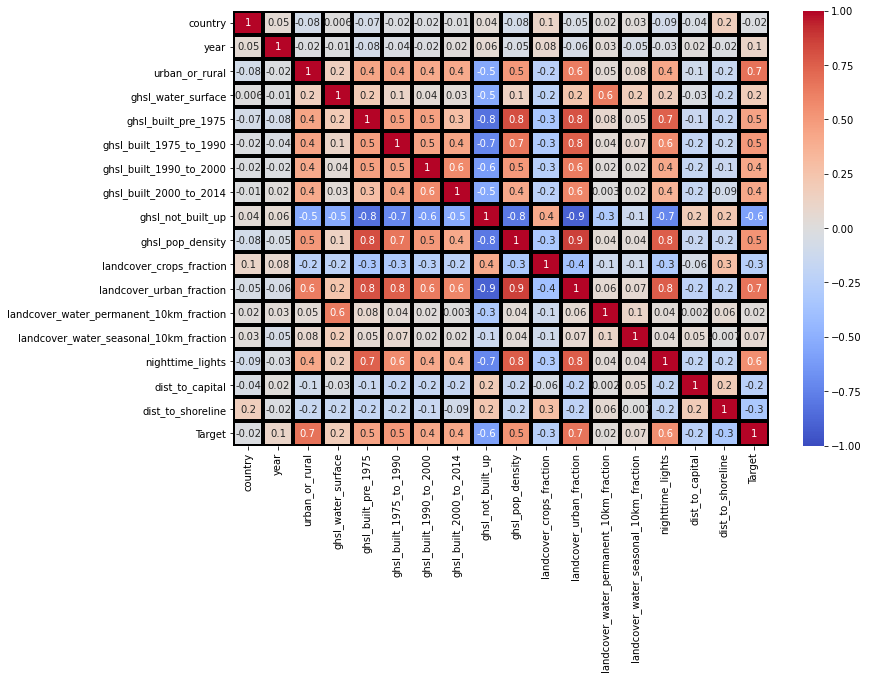

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
ax=sns.heatmap(data1.corr(),annot=True,fmt='.1g',vmin=-1, vmax=1, center= 0,cmap= 'coolwarm', linewidths=3, linecolor='black')
